In [1]:
import os 
import zipfile 
import tensorflow as tf 
from keras.preprocessing.image import ImageDataGenerator 
from keras import layers 
from keras import Model 
import matplotlib.pyplot as plt

In [2]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [26]:

#sns.set(rc={'axes.facecolor': 'lightblue', 'figure.facecolor': 'lightblue'})

def confusionMatrixAndAccuracyReport(Y_test, Y_pred, label):
    cm = metrics.confusion_matrix(Y_test, Y_pred)
    overallAccuracy = np.trace(cm)/sum(cm.flatten())

    classwiseAccuracy = cm.diagonal()/cm.sum(axis=1)

    plt.figure(figsize=(10, 10))
    plt.title('Accuracy Score: {0:3.3f}'.format(overallAccuracy), size=14)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    sns.heatmap(data=cm, annot=True, square=True,  cmap='Blues', fmt='g')

    plt.show()
    print('Overall Accuracy Score: {0:3.3f}'.format(overallAccuracy))
    print('Classwise Accuracy Score: {0}'.format(classwiseAccuracy))

Data fitting to folder

In [ ]:
import shutil
shutil.rmtree('data')
os.mkdir('data')
os.mkdir(os.path.join('data','train'))
os.mkdir(os.path.join('data','train','class_a'))
os.mkdir(os.path.join('data','train','class_not_a'))
os.mkdir(os.path.join('data','validation'))
os.mkdir(os.path.join('data','validation','class_a'))
os.mkdir(os.path.join('data','validation','class_not_a'))

In [ ]:


voc_label_path ='VOCdevkit/VOC2012/ImageSets/Main/'
voc_img_path ='VOCdevkit/VOC2012/JPEGImages/'
data_path ='data'
train_path =os.path.join(data_path,'train')
val_path =os.path.join(data_path,'validation')

selected_class = 'dog'
labels_train = open(voc_label_path + selected_class + '_train.txt','r',encoding = 'utf-8')
labels_validation = open(voc_label_path + selected_class + '_val.txt','r',encoding = 'utf-8')


cls_a_cnt={'train':0,'val':0}
cls_nt_a_cnt={'train':0,'val':0}


for line in labels_train:
    if cls_a_cnt['val']==50 and cls_nt_a_cnt['val'] ==50:
        break
    #print(line,end='')
    img,cls = line.split(' ', 1)
    if cls==' 1\n' and cls_a_cnt['train']<50:
        src = os.path.join(voc_img_path,img+'.jpg')
        dest = os.path.join(train_path,'class_a',img+'.jpg')
        x=shutil.copy2(src,dest)
        cls_a_cnt['train'] +=1
    if cls=='-1\n' and cls_nt_a_cnt['train']<50:
        src = os.path.join(voc_img_path,img+'.jpg')
        dest = os.path.join(train_path,'class_not_a',img+'.jpg')
        x=shutil.copy2(src,dest)
        cls_nt_a_cnt['train'] +=1
for line in labels_validation:
    if cls_a_cnt['val']==50 and cls_nt_a_cnt['val'] ==50:
        break
    #print(line,end='')
    img,cls = line.split(' ', 1)
    if cls==' 1\n':
        src = os.path.join(voc_img_path,img+'.jpg')
        dest = os.path.join(val_path,'class_a',img+'.jpg')
        x=shutil.copy2(src,dest)
        cls_a_cnt['val'] +=1
    if cls=='-1\n':
        src = os.path.join(voc_img_path,img+'.jpg')
        dest = os.path.join(val_path,'class_not_a',img+'.jpg')
        x=shutil.copy2(src,dest)
        cls_nt_a_cnt['val'] +=1

print('Process ends')

In [3]:

base_dir = 'data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'class_a')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'class_not_a')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'class_a')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'class_not_a')

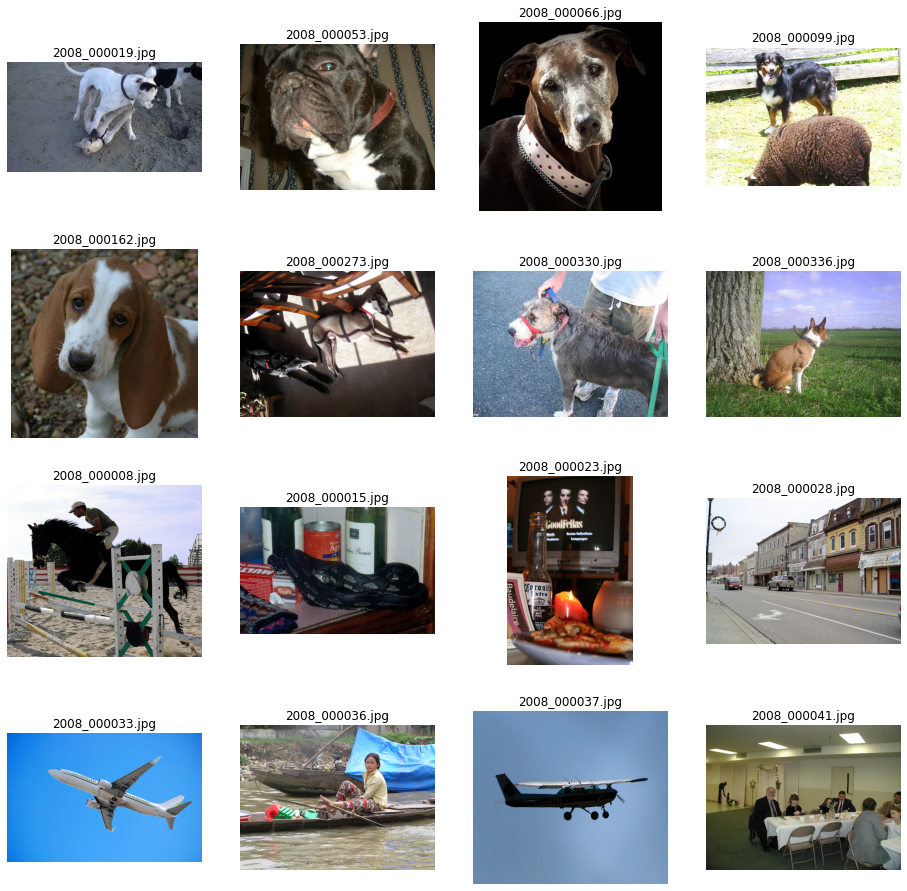

In [4]:
# Set up matplotlib fig, and size it to fit 4x4 pics
import matplotlib.image as mpimg
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 8
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index]
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  sp.set_title(img_path.split('\\')[3])
 # print(img.shape)
plt.show()

In [5]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator()

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(validation_split=0.1  )

In [16]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 1, class_mode = None,
 target_size = (224, 224),shuffle=False,seed=42)

Found 100 images belonging to 2 classes.


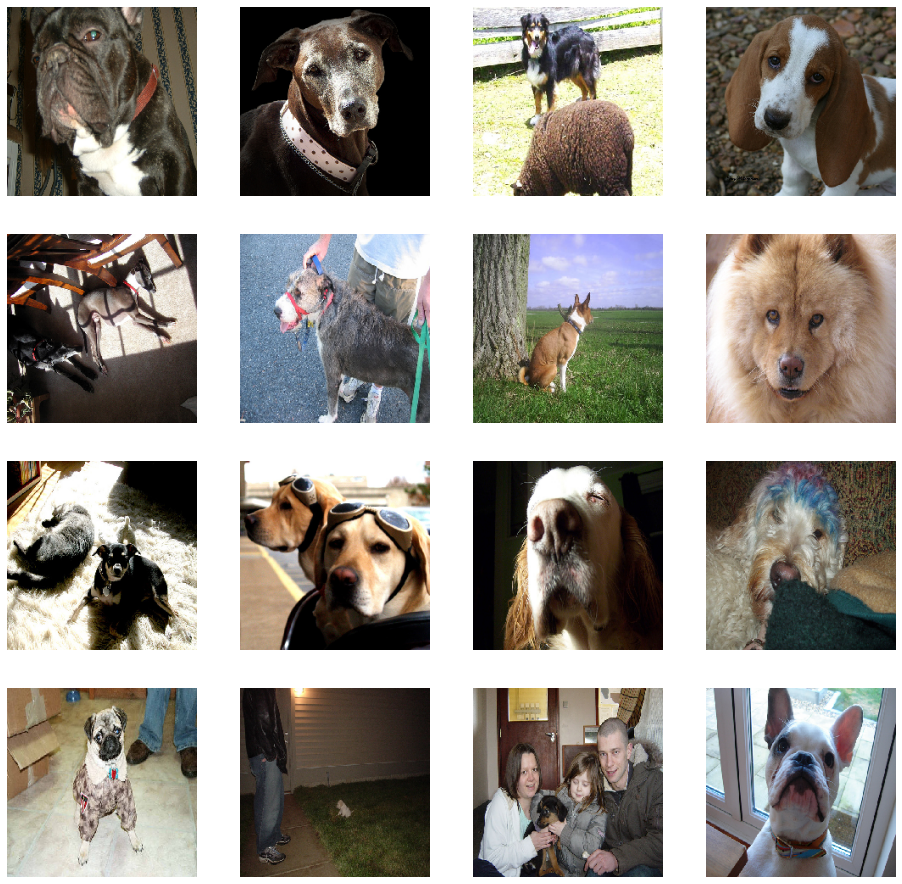

In [18]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
for i, img in enumerate(train_generator):
  if i==16:
    break
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  plt.imshow(img[0].astype('uint8'))
plt.show()

In [22]:

from keras.applications  import ResNet50

base_model = ResNet50(input_shape = (224, 224, 3), # Shape of our images
weights = 'imagenet')

102967424/102967424 [==============================] - 20s 0us/step


In [23]:
vgg_pred_train = base_model.predict(train_generator)

100/100 [==============================] - 10s 96ms/step


In [24]:
print(vgg_pred_train.shape)
pred_inet_class = vgg_pred_train.argmax(axis=1)
print(pred_inet_class)
pred_class = np.where((pred_inet_class<251)&(pred_inet_class>150),0,1) 
print(pred_class)

(100, 1000)
[172 245 246 267 161 237 196 104 261 227 178 212 202 251 203 461 245 191
 237  84 217 237 904 173 171 178 219 617 196 496 254 170 239 164 170 254
 209 250 568 569 209 161 257 537 216 256 242 172 270 246 716 686 898 829
 812 693 895 559 466 282 706 785 581 708 598 344 281 978 840 575 670 876
 650 203 786 339 339 603 880  84 310 815 627 911 581 468 738 479 561  21
 751 444 895 877 614 461 399 627 284 625]
[0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0
 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


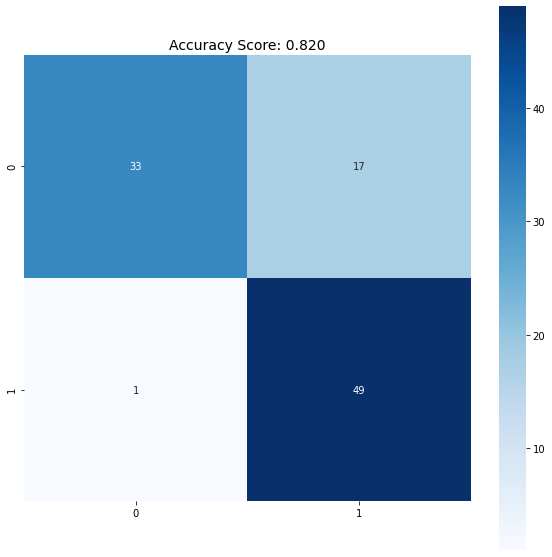

Overall Accuracy Score: 0.820
Classwise Accuracy Score: [0.66 0.98]


In [27]:
confusionMatrixAndAccuracyReport(train_generator.labels,pred_class,train_generator.classes)

In [28]:
validation_generator = test_datagen.flow_from_directory( validation_dir,  batch_size = 10, class_mode = 'binary',
 target_size = (224, 224),subset='validation')

Found 581 images belonging to 2 classes.


In [29]:
vgg_pred_test = base_model.predict(validation_generator)

59/59 [==============================] - 38s 624ms/step


In [118]:
from sklearn.svm import SVC
svc_model = SVC(kernel='linear',C=0.83, probability=True)

In [119]:
svmclf =svc_model.fit(vgg_pred_train, train_generator.labels)

In [120]:

svmpred = svmclf.predict(vgg_pred_test)

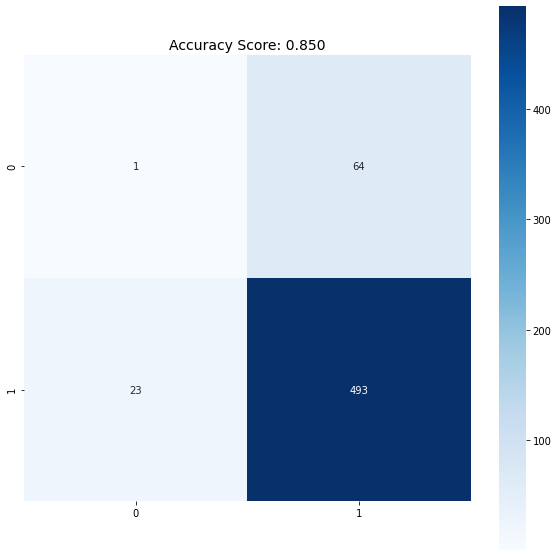

Overall Accuracy Score: 0.850
Classwise Accuracy Score: [0.01538462 0.95542636]


In [121]:
confusionMatrixAndAccuracyReport(validation_generator.labels,svmpred,validation_generator.classes)